## Question B: Probable uptake or purchase count of the products
### Data and Methodology
- **Data Sources:** Customer profiles, purchase history, and interaction data.


In [1]:
!pip install boto3
!pip install pandas
!pip install io
!pip install matplotlib
!pip install numpy

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import boto3
import pandas as pd
from io import BytesIO,  StringIO
# Regular EDA(exploratory data analysis) and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm

In [4]:
def data_read(file_name):   
    '''
    This Functions Reads a csv file from datathon3.0 bucket.
    file name : file name of the csv to be read.
    '''
    # Initialize a boto3 client with your AWS credentials
    # Access key ID & Secret access key shared in your mail
    s3_client = boto3.client(
        's3',
        aws_access_key_id='your_aws_access_key',
        aws_secret_access_key='your_aws_secret_access_key'
    )
    
    ### Read  CSV file from S3
    # Specify your  AWS S3 bucket  name
    bucket_name = 'datathon-3.0'
    read_file_name = file_name
    
    # Get the object from the bucket
    response = s3_client.get_object(Bucket=bucket_name, Key=read_file_name)
    
    # Read the object (which is in bytes) into a DataFrame
    return pd.read_csv(BytesIO(response['Body'].read()))

In [5]:
## Import Data
q1_customer = data_read('Q1-customers.csv')
sample_subq1 = data_read('Q1-submission.csv')

q2_new_prod = data_read('Q2-new-products.csv')
sample_subq2 = data_read('Q2-submission.csv')

sample_subq4A = data_read('Q4A-submission.csv')
sample_subq4B = data_read('Q4B-submission.csv')

df_cp = data_read('TBL_CUSTOMER_PROFILE.csv')
df_dc = data_read('TBL_DATA_CONSUMPTION.csv')
df_pp = data_read('TBL_PACK_PURCHASE.csv')
df_pc = data_read('TBL_PRODUCT_CATALOGUE.csv')

### customer profile info

In [5]:
df_cp

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE
0,CD1F7653F6BE80,Standard,20191231,Fiber Optic,Low End,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0000,0.8416
1,CD1F768EE45143,Standard,20211107,Cable Broadband,High End,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0000,0.8069
2,CD1F769AD050BF,Standard,20230112,Fiber Optic,High End,47.3220,18.2921,3.2387,20.0176,3.9060,0.0180,0.0540,0.0506,7.1010
3,CD1F769C960283,Standard,20220611,Cable Broadband,Low End,41.2983,26.2252,4.2466,22.3891,0.8242,0.0009,0.0061,0.0000,5.0095
4,CD1F77E09E8A7A,Standard,20220920,Fiber Optic,Low End,32.0709,59.0923,3.6369,4.9594,0.0000,0.0000,0.0000,0.0000,0.2405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342638,CD2188148CE46C,Premium,20230112,Fixed Wireless,High End,88.4883,3.7004,5.9196,1.0761,0.0917,0.0000,0.0064,0.0000,0.7174
342639,CD21881BADDFDD,Premium,20230517,Fixed Wireless,High End,70.9947,19.5270,2.8474,1.2647,5.1661,0.0343,0.0111,0.0000,0.1547
342640,CD2188343196DD,Premium,20230605,Cable Broadband,High End,70.1420,15.7043,3.9873,0.7313,4.3274,0.0000,0.0440,0.0001,5.0635
342641,CD2188343A44E3,Premium,20230605,Fiber Optic,High End,33.9025,17.5726,15.9742,28.2133,1.9269,0.2026,0.0346,0.0000,2.1735


In [6]:
# df_cp.isna().sum()

In [6]:
mapping_dict = {'Premium': 0, 'Standard': 1}
mapping_dict2 = {'Fiber Optic': 0, 'Cable Broadband': 1, 'Fixed Wireless' :  2}
mapping_dict3 = {'Low End': 0, 'High End': 1}


# Replace the values in the 'subscription_type' column using the dictionary
df_cp['SERVICE_TYPE'] = df_cp['SERVICE_TYPE'].map(mapping_dict)
df_cp['CONNECTION_TYPE'] = df_cp['CONNECTION_TYPE'].map(mapping_dict2)
df_cp['ROUTER_CATEGORY'] = df_cp['ROUTER_CATEGORY'].map(mapping_dict3)

In [7]:
df_cp.ROUTER_CATEGORY.value_counts()

ROUTER_CATEGORY
0    234231
1    108412
Name: count, dtype: int64

In [19]:
df_cp['FIRST_CONNECTION_DATE'] = pd.to_datetime(df_cp['FIRST_CONNECTION_DATE'], format='%Y%m%d')
df_cp['year'] = df_cp['FIRST_CONNECTION_DATE'].dt.year

df_cp.head()

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE,year
0,CD1F7653F6BE80,Standard,2019-12-31,Fiber Optic,Low End,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0000,0.8416,2019
1,CD1F768EE45143,Standard,2021-11-07,Cable Broadband,High End,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0000,0.8069,2021
2,CD1F769AD050BF,Standard,2023-01-12,Fiber Optic,High End,47.3220,18.2921,3.2387,20.0176,3.9060,0.0180,0.0540,0.0506,7.1010,2023
3,CD1F769C960283,Standard,2022-06-11,Cable Broadband,Low End,41.2983,26.2252,4.2466,22.3891,0.8242,0.0009,0.0061,0.0000,5.0095,2022
4,CD1F77E09E8A7A,Standard,2022-09-20,Fiber Optic,Low End,32.0709,59.0923,3.6369,4.9594,0.0000,0.0000,0.0000,0.0000,0.2405,2022


In [8]:
df_cp.CUSTOMER_ID.nunique(), df_cp.shape

(342643, (342643, 14))

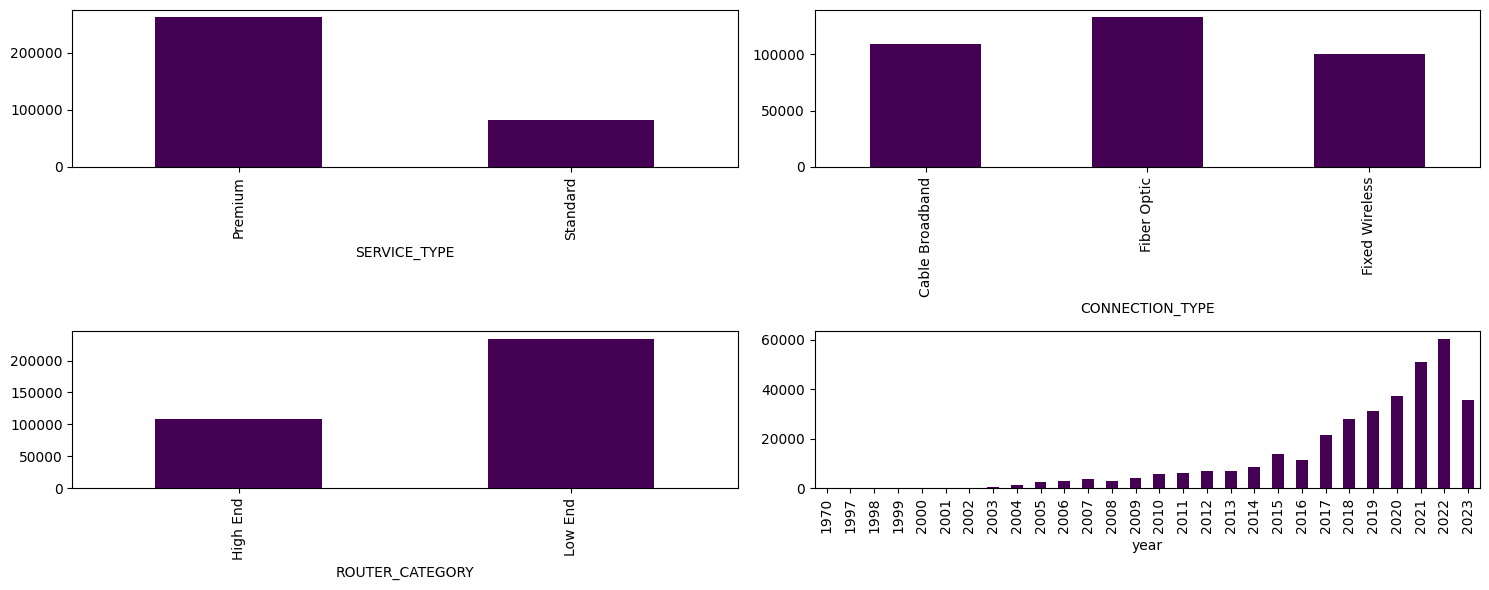

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
df_cp.SERVICE_TYPE.value_counts().sort_index().plot(kind='bar', cmap='viridis');
plt.subplot(2, 2, 2)
df_cp.CONNECTION_TYPE.value_counts().sort_index().plot(kind='bar', cmap='viridis');
plt.subplot(2, 2, 3)
df_cp.ROUTER_CATEGORY.value_counts().sort_index().plot(kind='bar', cmap='viridis');
plt.subplot(2, 2, 4)
df_cp.year.value_counts().sort_index().plot(kind='bar', cmap='viridis');
plt.tight_layout()

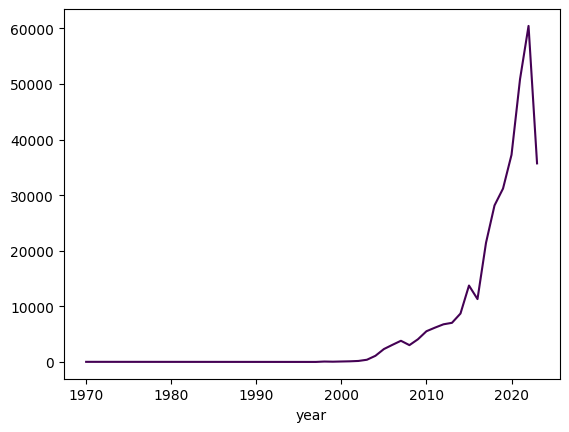

In [15]:
df_cp.year.value_counts().sort_index().plot(kind='line', cmap='viridis');

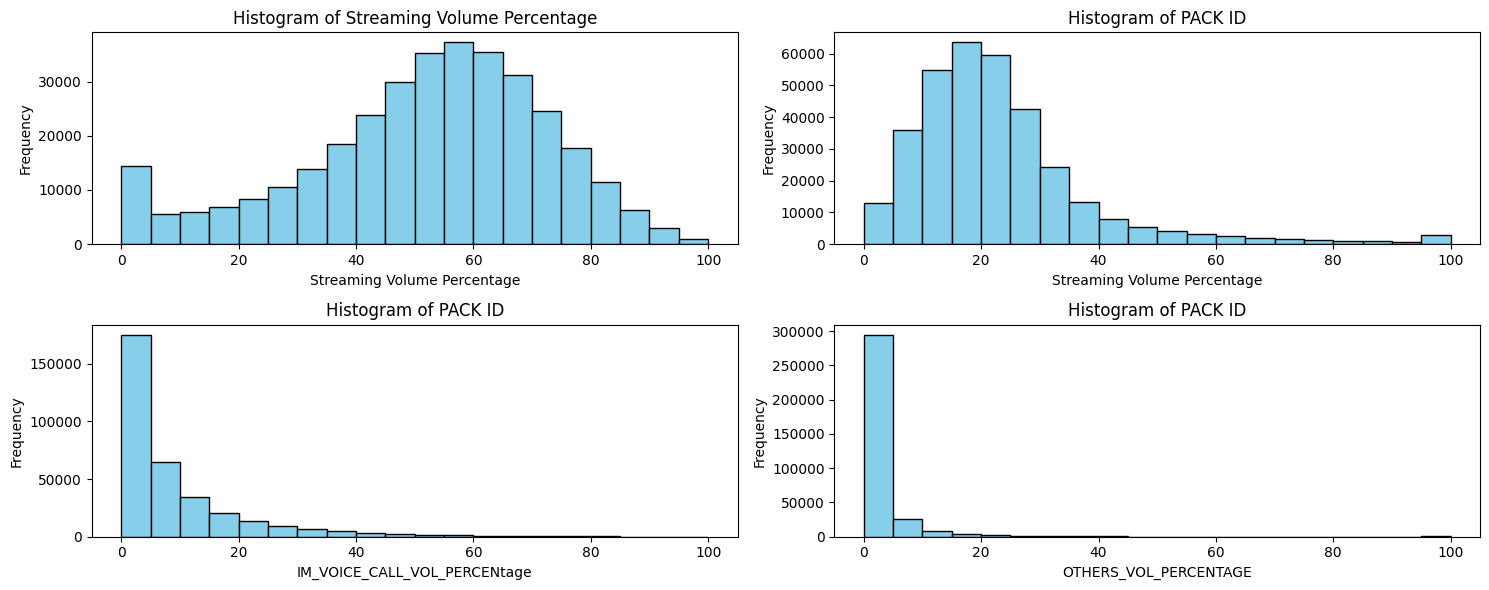

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)

xli = df_cp['STREAMING_VOL_PERCENTAGE'].tolist()
plt.hist(xli, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Streaming Volume Percentage')

plt.subplot(2, 2, 2)

xli = df_cp['WEB_BROWSING_VOL_PERCENTAGE'].tolist()
plt.hist(xli, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')




plt.subplot(2, 2, 3)
xli = df_cp['IM_VOICE_CALL_VOL_PERCENTAGE'].tolist()
plt.hist(xli, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('IM_VOICE_CALL_VOL_PERCENtage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')


plt.subplot(2, 2, 4)
xli = df_cp['OTHERS_VOL_PERCENTAGE'].tolist()
plt.hist(xli, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('OTHERS_VOL_PERCENTAGE')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')


plt.tight_layout()
plt.show()

### data consumption info


In [25]:
print(df_dc.shape)
df_dc['EVENT_DATE'] = pd.to_datetime(df_dc['EVENT_DATE'], format='%Y%m%d')
df_dc.head(3)

(23375373, 4)


,EVENT_DATE,CUSTOMER_ID,TOTAL_VOLUME_GB,VOLUME_GB_IN_HIGH_BANDWIDTH
0,2019-09-14,CD1F7653F6BE80,14.2695,14.2695
1,2019-09-16,CD1F7653F6BE80,22.2891,22.2891
2,2019-07-16,CD1F7653F6BE80,26.3086,26.3086


## Pack purchase Info

In [11]:
print(df_pp.shape)
df_pp.head(4)

(1208710, 4)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS
0,20190703,CD20EDFC8000A7,1756,1
1,20190522,CD1F932E0A89C1,1524,1
2,20190522,CD201715F62164,1524,1
3,20190623,CD1F7B4DD83C5B,1524,1


In [26]:
df_pp['EVENT_DATE'] = pd.to_datetime(df_pp['EVENT_DATE'], format='%Y%m%d')

# Extract the year, month, and day into separate columns
df_pp['year'] = df_pp['EVENT_DATE'].dt.year
df_pp['month'] = df_pp['EVENT_DATE'].dt.month
df_pp['day'] = df_pp['EVENT_DATE'].dt.day


In [27]:
df_pp.CUSTOMER_ID.nunique()

342635

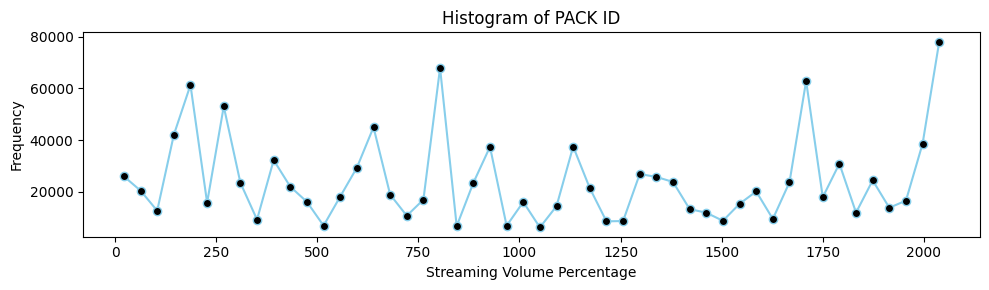

In [28]:
xli = df_pp['PACK_ID'].tolist()

# Calculate the histogram data
counts, bin_edges = np.histogram(xli, bins=50)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram as a line plot
plt.figure(figsize=(10, 3))
plt.plot(bin_centers, counts, color='skyblue', linestyle='-', marker='o', markerfacecolor='black')

# Adding titles and labels
plt.xlabel('Streaming Volume Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of PACK ID')

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()

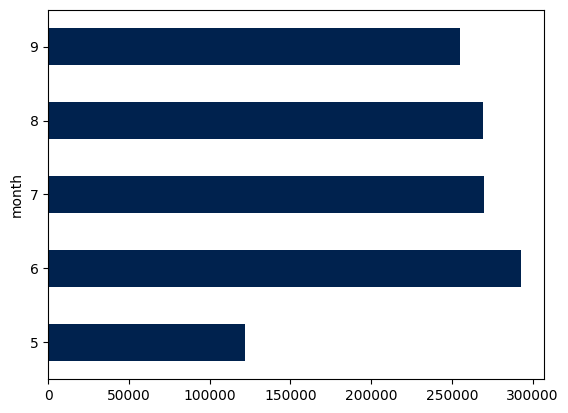

In [29]:
df_pp.month.value_counts().sort_index().plot(kind='barh', cmap='cividis');

## product catalogue


In [14]:
print(df_pc.shape)
df_pc.head(2)

(2049, 7)


,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue
1,2,Standard,Cash,328,30,24.0,Continue


In [15]:
sorted_df = df_pp.groupby('CUSTOMER_ID').apply(lambda x: x.sort_values('EVENT_DATE', ascending=False)).reset_index(drop=True)
sorted_df

/tmp/ipykernel_121108/4075501485.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_df = df_pp.groupby('CUSTOMER_ID').apply(lambda x: x.sort_values('EVENT_DATE', ascending=False)).reset_index(drop=True)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month,day
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,3
1,2019-06-30,CD1D60A2535570,765,1,2019,6,30
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,23
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,9
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,4
...,...,...,...,...,...,...,...
1208705,2019-06-21,CD223A7CE260D4,1713,1,2019,6,21
1208706,2019-05-22,CD223A7CE260D4,942,1,2019,5,22
1208707,2019-08-14,CD223EEE99E08F,136,1,2019,8,14
1208708,2019-08-09,CD223EEE99E08F,1048,1,2019,8,9


In [16]:
df_ppn = sorted_df.copy()
df_ppn[:10]

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month,day
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,3
1,2019-06-30,CD1D60A2535570,765,1,2019,6,30
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,23
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,9
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,4
5,2019-06-29,CD1D60C1412B40,1969,1,2019,6,29
6,2019-06-22,CD1D60C1412B40,1969,1,2019,6,22
7,2019-06-09,CD1D60C1412B40,1969,1,2019,6,9
8,2019-05-21,CD1D60C1412B40,653,1,2019,5,21
9,2019-09-12,CD1D60C21B3815,241,1,2019,9,12


In [17]:
print(df_dc.shape)
print()
print(df_cp.shape)
print()
print(df_pc.shape)
print(df_ppn.shape)

(23375373, 4)

(342643, 14)

(2049, 7)
(1208710, 7)


In [18]:
df_cp.head(3)

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE
0,CD1F7653F6BE80,1,2019-12-31,0,0,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0000,0.8416
1,CD1F768EE45143,1,2021-11-07,1,1,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0000,0.8069
2,CD1F769AD050BF,1,2023-01-12,0,1,47.3220,18.2921,3.2387,20.0176,3.9060,0.0180,0.0540,0.0506,7.1010


In [19]:
df_cp.fillna(method='ffill', inplace=True)

/tmp/ipykernel_121108/1286679186.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cp.fillna(method='ffill', inplace=True)


In [20]:
merged_df = pd.merge(df_ppn, df_pc, on='PACK_ID', how='inner')

# Print the shape of the merged dataframe
print(merged_df.shape)

# Display the first few rows of the merged dataframe
merged_df[:10]

(1208710, 13)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month,day,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,3,Standard,Digital Wallets,264,30,40.0,Discontinue
1,2019-06-30,CD1D60A2535570,765,1,2019,6,30,Standard,Digital Wallets,136,3,16.8,Discontinue
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,23,Standard,Mobile Walet,798,30,80.0,Discontinue
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,9,Premium,Credit Card,192,3,32.0,Discontinue
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,4,Premium,Credit Card,192,3,32.0,Discontinue
5,2019-06-29,CD1D60C1412B40,1969,1,2019,6,29,Premium,Credit Card,192,3,32.0,Discontinue
6,2019-06-22,CD1D60C1412B40,1969,1,2019,6,22,Premium,Credit Card,192,3,32.0,Discontinue
7,2019-06-09,CD1D60C1412B40,1969,1,2019,6,9,Premium,Credit Card,192,3,32.0,Discontinue
8,2019-05-21,CD1D60C1412B40,653,1,2019,5,21,Premium,Credit Card,192,3,40.0,Discontinue
9,2019-09-12,CD1D60C21B3815,241,1,2019,9,12,Premium,Mobile Walet,336,7,44.0,Continue


In [21]:
df_pc = df_pc.rename(columns={'SERVICE_TYPE': 'SERVICE_TYPE_PACK'})

In [22]:
df_pc = data_read('TBL_PRODUCT_CATALOGUE.csv')
df_pc = df_pc.rename(columns={'SERVICE_TYPE': 'SERVICE_TYPE_PACK'})
df_pc

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue
1,2,Standard,Cash,328,30,24.0,Continue
2,3,Premium,Mobile Walet,176,3,24.0,Discontinue
3,4,Premium,Cash,558,15,64.0,Discontinue
4,5,Premium,Cash,300,7,20.0,New
...,...,...,...,...,...,...,...
2044,2055,Premium,Digital Wallets,180,7,68.0,Discontinue
2045,2056,Standard,Digital Wallets,178,3,52.0,Discontinue
2046,2057,Premium,Mobile Walet,996,30,176.0,Discontinue
2047,2058,Premium,Cash,1948,30,80.0,New


In [23]:
mapping_dic = {'Premium': 0, 'Standard': 1}
mapping_dic2 = {'Cash': 0, 'Mobile Walet': 1, 'Digital Wallets':  2, 'Credit Card': 3}
df_pc['SERVICE_TYPE_PACK'] = df_pc['SERVICE_TYPE_PACK'].map(mapping_dic)
df_pc['PAYMENT_METHOD'] = df_pc['PAYMENT_METHOD'].map(mapping_dic2)

In [24]:
df_pc.head()

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,1,2,1298,30,320.0,Discontinue
1,2,1,0,328,30,24.0,Continue
2,3,0,1,176,3,24.0,Discontinue
3,4,0,0,558,15,64.0,Discontinue
4,5,0,0,300,7,20.0,New


In [25]:
new_product = df_pc[df_pc['PRODUCT_STATUS']=='New'].reset_index(drop=True)
packli = new_product.PACK_ID.tolist()
new_product

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,5,0,0,300,7,20.0,New
1,10,0,0,440,7,80.0,New
2,14,1,3,136,7,12.0,New
3,22,1,1,394,30,64.0,New
4,23,0,1,476,7,88.0,New
...,...,...,...,...,...,...,...
522,2042,1,2,798,30,160.0,New
523,2046,1,3,178,7,14.0,New
524,2051,0,3,136,7,24.0,New
525,2053,0,0,476,7,112.0,New


In [26]:
merged_df.head(3)

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month,day,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,3,Standard,Digital Wallets,264,30,40.0,Discontinue
1,2019-06-30,CD1D60A2535570,765,1,2019,6,30,Standard,Digital Wallets,136,3,16.8,Discontinue
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,23,Standard,Mobile Walet,798,30,80.0,Discontinue


In [27]:
df_pc.head(3)

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,1,1,2,1298,30,320.0,Discontinue
1,2,1,0,328,30,24.0,Continue
2,3,0,1,176,3,24.0,Discontinue


In [28]:
df_cp

,CUSTOMER_ID,SERVICE_TYPE,FIRST_CONNECTION_DATE,CONNECTION_TYPE,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE
0,CD1F7653F6BE80,1,2019-12-31,0,0,70.0205,14.6609,3.6914,8.5530,2.1653,0.0297,0.0376,0.0000,0.8416
1,CD1F768EE45143,1,2021-11-07,1,1,72.1494,11.6056,3.2767,1.6749,10.2768,0.0000,0.2096,0.0000,0.8069
2,CD1F769AD050BF,1,2023-01-12,0,1,47.3220,18.2921,3.2387,20.0176,3.9060,0.0180,0.0540,0.0506,7.1010
3,CD1F769C960283,1,2022-06-11,1,0,41.2983,26.2252,4.2466,22.3891,0.8242,0.0009,0.0061,0.0000,5.0095
4,CD1F77E09E8A7A,1,2022-09-20,0,0,32.0709,59.0923,3.6369,4.9594,0.0000,0.0000,0.0000,0.0000,0.2405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342638,CD2188148CE46C,0,2023-01-12,2,1,88.4883,3.7004,5.9196,1.0761,0.0917,0.0000,0.0064,0.0000,0.7174
342639,CD21881BADDFDD,0,2023-05-17,2,1,70.9947,19.5270,2.8474,1.2647,5.1661,0.0343,0.0111,0.0000,0.1547
342640,CD2188343196DD,0,2023-06-05,1,1,70.1420,15.7043,3.9873,0.7313,4.3274,0.0000,0.0440,0.0001,5.0635
342641,CD2188343A44E3,0,2023-06-05,0,1,33.9025,17.5726,15.9742,28.2133,1.9269,0.2026,0.0346,0.0000,2.1735


In [29]:
merged_df1 = pd.merge(merged_df, df_cp, on='CUSTOMER_ID', how='inner')

# Print the shape of the merged dataframe
print(merged_df1.shape)

# Display the first few rows of the merged dataframe
merged_df1.head()

(1208710, 26)


,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,year,month,day,SERVICE_TYPE_x,PAYMENT_METHOD,PACK_PRICE,...,ROUTER_CATEGORY,STREAMING_VOL_PERCENTAGE,WEB_BROWSING_VOL_PERCENTAGE,IM_VOICE_CALL_VOL_PERCENTAGE,SNS_VOL_PERCENTAGE,FILE_ACCESS_VOL_PERCENTAGE,GAME_VOL_PERCENTAGE,NAVIGATION_VOL_PERCENTAGE,EMAIL_VOL_PERCENTAGE,OTHERS_VOL_PERCENTAGE
0,2019-09-03,CD1D5D15041AD0,899,1,2019,9,3,Standard,Digital Wallets,264,...,0,50.0364,25.7554,12.2222,1.2339,9.6390,0.0085,0.2086,0.0,0.8960
1,2019-06-30,CD1D60A2535570,765,1,2019,6,30,Standard,Digital Wallets,136,...,0,63.0056,13.9577,12.0097,7.4318,0.2740,0.0008,0.0000,0.0,3.3204
2,2019-05-23,CD1D60AB986EA8,28,1,2019,5,23,Standard,Mobile Walet,798,...,0,31.6600,5.8457,42.4100,18.0894,1.6197,0.0072,0.0033,0.0,0.3646
3,2019-07-09,CD1D60C1412B40,1969,1,2019,7,9,Premium,Credit Card,192,...,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878
4,2019-07-04,CD1D60C1412B40,1969,1,2019,7,4,Premium,Credit Card,192,...,0,65.4430,16.9810,4.7375,8.9215,2.5973,0.0003,0.0315,0.0,1.2878


In [30]:
merged_df1.columns

Index(['EVENT_DATE', 'CUSTOMER_ID', 'PACK_ID', 'HITS', 'year', 'month', 'day',
       'SERVICE_TYPE_x', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY',
       'DATA_VOL_GB', 'PRODUCT_STATUS', 'SERVICE_TYPE_y',
       'FIRST_CONNECTION_DATE', 'CONNECTION_TYPE', 'ROUTER_CATEGORY',
       'STREAMING_VOL_PERCENTAGE', 'WEB_BROWSING_VOL_PERCENTAGE',
       'IM_VOICE_CALL_VOL_PERCENTAGE', 'SNS_VOL_PERCENTAGE',
       'FILE_ACCESS_VOL_PERCENTAGE', 'GAME_VOL_PERCENTAGE',
       'NAVIGATION_VOL_PERCENTAGE', 'EMAIL_VOL_PERCENTAGE',
       'OTHERS_VOL_PERCENTAGE'],
      dtype='object')

In [31]:
customer_id_counts = pd.DataFrame(merged_df1['CUSTOMER_ID'].value_counts())

customer_id_counts.head(100)

,count
CUSTOMER_ID,
CD215B1AF4D15A,125
CD217564DFE5BB,121
CD215D8CB25CE0,111
CD215B73FA6614,111
CD213F3F21658E,111
...,...
CD2164567E1AB0,64
CD210057C762A0,64
CD212035800AC6,63


In [34]:
numerical_columns = [
    'PACK_ID', 'HITS', 'year', 'month', 'day', 'SERVICE_TYPE_PACK',
    'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'ROUTER_CATEGORY',
    'STREAMING_VOL_PERCENTAGE', 'WEB_BROWSING_VOL_PERCENTAGE',
    'IM_VOICE_CALL_VOL_PERCENTAGE', 'SNS_VOL_PERCENTAGE',
    'FILE_ACCESS_VOL_PERCENTAGE', 'GAME_VOL_PERCENTAGE',
    'NAVIGATION_VOL_PERCENTAGE', 'EMAIL_VOL_PERCENTAGE',
    'OTHERS_VOL_PERCENTAGE']

In [35]:
drop_columns =[  'year', 'month', 'day',
       'SERVICE_TYPE_x', 'PAYMENT_METHOD', 'PRODUCT_STATUS', 'SERVICE_TYPE_y',
       'FIRST_CONNECTION_DATE', 'CONNECTION_TYPE', 'ROUTER_CATEGORY',
       'STREAMING_VOL_PERCENTAGE', 'WEB_BROWSING_VOL_PERCENTAGE',
       'IM_VOICE_CALL_VOL_PERCENTAGE', 'SNS_VOL_PERCENTAGE',
       'FILE_ACCESS_VOL_PERCENTAGE', 'GAME_VOL_PERCENTAGE',
       'NAVIGATION_VOL_PERCENTAGE', 'EMAIL_VOL_PERCENTAGE',
       'OTHERS_VOL_PERCENTAGE']
     

In [ ]:
#merged_df_copy=merged_df1[:1000]


In [ ]:
# import pandas as pd
# import numpy as np
# from multiprocessing import Pool, cpu_count

# def calculate_pack_score(row1, mean_price, mean_validity, mean_volume, row2):
#     score = (abs(row1['PACK_PRICE'] - row2['PACK_PRICE']) +
#              abs(row1['VALIDITY'] - row2['VALIDITY']) +
#              abs(row1['DATA_VOL_GB'] - row2['DATA_VOL_GB']))

#     check = (abs(mean_price - row2['PACK_PRICE']) +
#              abs(mean_validity - row2['VALIDITY']) +
#              abs(mean_volume - row2['DATA_VOL_GB']))

#     if score < check:
#         return row2['PACK_ID'], score
#     return None

# def process_pack_id(args):
#     row1, mean_price, mean_validity, mean_volume, pack_id, row2 = args
#     return calculate_pack_score(row1, mean_price, mean_validity, mean_volume, row2)

# def calculate_frequency(df):
#     pack_set = set(df['PACK_ID'].unique())
#     mean_price = df['PACK_PRICE'].mean()
#     mean_validity = df['VALIDITY'].mean()
#     mean_volume = df['DATA_VOL_GB'].mean()

#     # Calculate frequencies and ratios
#     pack_frequency = df['PACK_ID'].value_counts()
#     total_packs = pack_frequency.sum()
#     pack_freq_ratio = (pack_frequency / total_packs).to_dict()

#     # Calculate recency scores
#     latest_date = df['EVENT_DATE'].max()
#     recency_scores = (latest_date - df.groupby('PACK_ID')['EVENT_DATE'].max()).dt.days

#     # Normalize recency scores
#     recency_scores_inverted = recency_scores.max() - recency_scores
#     recency_probability = ((recency_scores_inverted - recency_scores_inverted.min()) /
#                            (recency_scores_inverted.max() - recency_scores_inverted.min()))
#     recency_probability += 1e-10  # Ensure no probability is zero
#     pack_recency_probability_dict = recency_probability.to_dict()

#     # Calculate final dictionary
#     final_dict = {i: pack_recency_probability_dict[i] + pack_freq_ratio[i] for i in pack_set}
#     sorted_final_dict = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True))
#     first_key = next(iter(sorted_final_dict))

#     # Prepare data for parallel processing
#     row1 = df[df['PACK_ID'] == first_key].iloc[0]
#     args_list = [(row1, mean_price, mean_validity, mean_volume, i, df[df['PACK_ID'] == i].iloc[0]) 
#                  for i in sorted_final_dict if i != first_key]

#     # Parallel processing
#     with Pool(cpu_count()) as pool:
#         results = pool.map(process_pack_id, args_list)

#     # Collect results into submit_dict1
#     submit_dict1 = {result[0]: result[1] for result in results if result is not None}

#     if not submit_dict1:
#         return 0, 0

#     # Sort submit_dict1 and get the first key and its value
#     first_key_submit = min(submit_dict1, key=submit_dict1.get)
#     row_hit_median = df[df['PACK_ID'] == first_key]['HITS'].median()

#     return first_key_submit, row_hit_median

In [30]:
def calculate_frequency(df):
    '''
    Calculates the frequency.
    '''
    pack_set = set(df['PACK_ID'].unique())
    mean_price = df['PACK_PRICE'].mean()
    mean_validity = df['VALIDITY'].mean()
    mean_vloumne=df['DATA_VOL_GB'].mean()
    
    pack_frequency = df['PACK_ID'].value_counts().sort_index()
    pack_freq_dict = pack_frequency.to_dict()
    
    # Pack frequency ratio
    total_packs = pack_frequency.sum()
    pack_freq_ratio = (pack_frequency / total_packs).to_dict()
    
    # Latest date
    latest_date = df['EVENT_DATE'].max()
    
    # Calculate the recency for each PACK_ID
    recency_scores = df.groupby('PACK_ID')['EVENT_DATE'].max().apply(lambda x: (latest_date - x).days)
    
    # Normalize the recency scores
    recency_scores_inverted = recency_scores.max() - recency_scores
    recency_probability = (recency_scores_inverted - recency_scores_inverted.min()) / (recency_scores_inverted.max() - recency_scores_inverted.min())
    recency_probability += 1e-10  # Ensure no probability is zero
    
    # Convert to a dictionary
    pack_recency_probability_dict = recency_probability.to_dict()
    pack_recency_probability_dict_sorted = {k: v for k, v in sorted(pack_recency_probability_dict.items(), key=lambda item: item[1], reverse=True)}
    
    final_dict = {i: pack_recency_probability_dict_sorted[i] + pack_freq_ratio[i] for i in pack_set}
    sorted_final_dict = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True))
    
    first_key = next(iter(sorted_final_dict))
    
    submit_dict1 = {}
    for i in final_data:
        row1 = df_pc[df_pc['PACK_ID'] == first_key].reset_index(drop=True)
        row2 = df_pc[df_pc['PACK_ID'] == i].reset_index(drop=True)
        if not row1.empty and not row2.empty:
            
            score = abs(row1.loc[0, 'PACK_PRICE'] - row2.loc[0, 'PACK_PRICE']) + abs(row1.loc[0, 'VALIDITY'] - row2.loc[0, 'VALIDITY']) + abs(row1.loc[0, 'DATA_VOL_GB'] - row2.loc[0, 'DATA_VOL_GB'])
            check=abs(mean_price- row2.loc[0, 'PACK_PRICE']) + abs(mean_validity - row2.loc[0, 'VALIDITY']) + abs(mean_vloumne - row2.loc[0, 'DATA_VOL_GB'])
            if score<check:
                submit_dict1[i] = score
    if len(submit_dict1) == 0:
        return 0,0
    
    
    sorted_submit_dict = dict(sorted(submit_dict1.items(), key=lambda item: item[1]))
    first_key_submit = next(iter(sorted_submit_dict))
    first_value = sorted_submit_dict[first_key_submit]
    row_hit_median = df[df['PACK_ID'] == first_key]['HITS'].median()
    hit = row_hit_median
    
    return first_key_submit, hit

In [ ]:
# def calculate_frequency(df):
#     pack_set = df['PACK_ID'].unique()
#     pack_frequency = df['PACK_ID'].value_counts()
#     total_packs = pack_frequency.sum()
#     pack_freq_ratio = pack_frequency / total_packs
    
#     latest_date = df['EVENT_DATE'].max()
#     recency_scores = latest_date - df.groupby('PACK_ID')['EVENT_DATE'].max()
#     recency_scores_inverted = recency_scores.max() - recency_scores
#     recency_probability = (recency_scores_inverted - recency_scores_inverted.min()) / (recency_scores_inverted.max() - recency_scores_inverted.min())
#     recency_probability += 1e-10
    
#     final_dict = {i: recency_probability[i] + pack_freq_ratio[i] for i in pack_set}
#     sorted_final_dict = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True))
    
#     first_key = next(iter(sorted_final_dict))
    
#     submit_dict1 = {}
#     row1 = df_pc[df_pc['PACK_ID'] == first_key].iloc[0]  # Cache the row for first_key once
#     for i in final_data:
#         row2 = df_pc[df_pc['PACK_ID'] == i].iloc[0]
#         score = abs(row1['PACK_PRICE'] - row2['PACK_PRICE']) + 
#                 abs(row1['VALIDITY'] - row2['VALIDITY']) + 
#                 abs(row1['DATA_VOL_GB'] - row2['DATA_VOL_GB'])
#         submit_dict1[i] = score
    
#     sorted_submit_dict = dict(sorted(submit_dict1.items(), key=lambda item: item[1]))
#     first_key_submit = next(iter(sorted_submit_dict))
    
#     row_hit_median = df.loc[df['PACK_ID'] == first_key, 'HITS'].median()
#     hit = row_hit_median
    
#     return first_key_submit, hit

In [ ]:
x,y=calculate_frequency(filtered_df)
x,y

In [ ]:
# import pandas as pd

# # Example DataFrame
# data = {
#     'PACK_ID': [101, 102, 102, 103, 103, 103, 104, 104, 104, 104]
# }
# df = pd.DataFrame(data)

# # Compute the frequency of each PACK_ID
# pack_frequency = df['PACK_ID'].value_counts().sort_index()

# # Convert the Series to a sorted list of tuples (pack_id, frequency)
# pack_freq_list = list(pack_frequency.items())

# # Calculate the total number of PACK_IDs for the frequency ratio
# total_packs = pack_frequency.sum()

# # Calculate the frequency ratio for each PACK_ID
# pack_freq_ratio = pack_frequency / total_packs

# # Convert the Series to a sorted list of tuples (pack_id, frequency_ratio)
# pack_freq_ratio_list = list(pack_freq_ratio.items())

# # Display the results
# print("Pack Frequency List (sorted by PACK_ID):", pack_freq_list)
# print("Pack Frequency Ratio List (sorted by PACK_ID):", pack_freq_ratio_list)

# # If you need to sort by frequency instead, you can sort pack_frequency before creating the lists
# pack_frequency_sorted = pack_frequency.sort_values(ascending=False)
# pack_freq_list_sorted = list(pack_frequency_sorted.items())
# pack_freq_ratio_sorted = pack_frequency_sorted / total_packs
# pack_freq_ratio_list_sorted = list(pack_freq_ratio_sorted.items())

# print("Pack Frequency List (sorted by frequency):", pack_freq_list_sorted)
# print("Pack Frequency Ratio List (sorted by frequency):", pack_freq_ratio_list_sorted)


In [37]:
q2_new=pd.merge(q2_new_prod,df_pc,on='PACK_ID',how='inner')
q2_new

,PACK_ID,SERVICE_TYPE_PACK,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,352,0,1,396,7,52.0,New
1,1735,0,2,396,7,72.0,New
2,179,0,1,336,7,32.0,New
3,1434,0,1,136,7,8.0,New
4,426,0,1,296,7,20.0,New
5,77,0,1,196,7,12.0,New
6,1856,0,1,196,7,10.0,New
7,150,0,1,1196,30,152.0,New
8,1563,0,1,996,30,80.0,New
9,801,0,2,1196,30,160.0,New


In [38]:
q2_new_prod.shape,q2_new.shape

((20, 1), (20, 7))

In [95]:
final_data=[ i for i in q2_new.PACK_ID]
final_data

[352,
 1735,
 179,
 1434,
 426,
 77,
 1856,
 150,
 1563,
 801,
 1424,
 1587,
 1576,
 90,
 404,
 29,
 1768,
 1705,
 74,
 544]

In [46]:
first_date = merged_df2['EVENT_DATE'].min()
last_date = merged_df2['EVENT_DATE'].max()

# Calculate the number of months between the two dates
month_count = (last_date.year - first_date.year) * 12 + last_date.month - first_date.month
month_count

4

In [40]:
merged_df2=merged_df1.copy()
merged_df2=merged_df2.drop(columns=drop_columns)
merged_df2

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB
0,2019-09-03,CD1D5D15041AD0,899,1,264,30,40.0
1,2019-06-30,CD1D60A2535570,765,1,136,3,16.8
2,2019-05-23,CD1D60AB986EA8,28,1,798,30,80.0
3,2019-07-09,CD1D60C1412B40,1969,1,192,3,32.0
4,2019-07-04,CD1D60C1412B40,1969,1,192,3,32.0
...,...,...,...,...,...,...,...
1208705,2019-06-21,CD223A7CE260D4,1713,1,1196,30,220.0
1208706,2019-05-22,CD223A7CE260D4,942,1,1196,30,260.0
1208707,2019-08-14,CD223EEE99E08F,136,1,328,7,24.0
1208708,2019-08-09,CD223EEE99E08F,1048,1,136,3,20.0


In [41]:
from tqdm import tqdm
tqdm.pandas()
grouped_result = merged_df2.groupby('CUSTOMER_ID').progress_apply(calculate_frequency).reset_index()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 342635/342635 [1:15:32<00:00, 75.59it/s]


In [119]:
x=grouped_result[0]
final_dict = {}

for i, j in x:
    if i in final_dict:
        final_dict[i] += j
    else:
        final_dict[i] = j

submit = pd.DataFrame(list(final_dict.items()), columns=['PACK_ID', 'HITS'])
submit['HITS']=submit['HITS']/5
submit

,PACK_ID,HITS
0,0,0.0
1,77,2640.5
2,1735,362.8
3,1587,2936.4
4,1563,1987.9
5,426,3199.3
6,801,3073.0
7,1424,2478.1
8,404,1516.7
9,90,1075.2


## Submission

In [133]:

df=submit.copy()

# Identify additional PACK_IDs in the DataFrame
additional_pack_ids = df[~df['PACK_ID'].isin(final_data)]['PACK_ID']

# Remove additional PACK_IDs from the DataFrame
df = df[~df['PACK_ID'].isin(additional_pack_ids)]
mean=df['HITS'].mean()
median=df['HITS'].median()
q1=median*.25
# Identify missing PACK_IDs
missing_pack_ids = [pack_id for pack_id in final_data if pack_id not in df['PACK_ID'].values]
# Get the PACK_IDs from the filtered DataFrame that are in final_data

# Create a DataFrame for missing PACK_IDs with HITS set to 0
missing_df = pd.DataFrame({'PACK_ID': missing_pack_ids, 'HITS': mean})

# Append the missing DataFrame to the original DataFrame
df = pd.concat([df, missing_df]).reset_index(drop=True)
df['HITS']=df['HITS'].round()
print(df)


    PACK_ID    HITS
0        77  2640.0
1      1735   363.0
2      1587  2936.0
3      1563  1988.0
4       426  3199.0
5       801  3073.0
6      1424  2478.0
7       404  1517.0
8        90  1075.0
9      1856    68.0
10     1434  4011.0
11     1768  1332.0
12      179  2063.0
13       29  1178.0
14      352   564.0
15       74  1299.0
16     1576   798.0
17      150     2.0
18     1705  1699.0
19      544  1699.0


In [137]:
Q1 = df['HITS'].quantile(0.25)
Q3 = df['HITS'].quantile(0.75)
mean=df['HITS'].mean()

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - .5 * IQR
upper_bound = Q3 + 1 * IQR
print(lower_bound,upper_bound)
less_than_lower = df['HITS'] < lower_bound
df.loc[less_than_lower, 'HITS'] = mean
upper_than_higher = df['HITS'] > upper_bound
df.loc[upper_than_higher, 'HITS'] = mean
df

643.875 3768.25


,PACK_ID,HITS
0,77,2640.00
1,1735,1865.51
2,1587,2936.00
3,1563,1988.00
4,426,3199.00
5,801,3073.00
6,1424,2478.00
7,404,1517.00
8,90,1075.00
9,1856,1699.10


In [138]:
df.to_csv('./output/nannu/q2/q2-v4.csv', index=False)  

In [139]:
data_write("Q2-submission.csv", df)

In [53]:
def data_write(file_name, df, buck="not-strong-enough-datathon-3.0"):   
    # Initialize a boto3 client with your AWS credentials
    # Access key ID & Secret access key shared in your mail
    s3_client = boto3.client(
        's3',
        aws_access_key_id='your_aws_access_key_id',
        aws_secret_access_key='your_aws_secret_access_key'
    )
    
    ### Read  CSV file from S3
    # Specify your  AWS S3 bucket  name
    bucket_name = buck
    
    ### write CSV file to S3
    write_file_name = file_name
    
    # Convert the dataframe to CSV
    csv_buffer = StringIO()
    df.to_csv(csv_buffer, index = False)
    
    # Write the CSV data to S3
    s3_client.put_object(Bucket=bucket_name, Key=write_file_name, Body=csv_buffer.getvalue())